In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
data = pd.read_csv(filepath_or_buffer="times.txt",
                   sep="[;\:\(]",
                   skipinitialspace=True,
                   engine="python",
                   header=None,
                   names = ["operation", "records", "rsize", "syscalls", "kind", "_", "time"])

# strip whitespace
strings = data.select_dtypes(['object'])
data[strings.columns] = strings.apply(lambda x: x.str.strip())

data['syscalls'] = data.syscalls == "sys"
data['bytes'] = data.records * data.rsize
data['speed'] = data.bytes / data.time

In [89]:
data

,operation,records,rsize,syscalls,kind,_,time,bytes,speed
0,copy,5000,4,True,user,ms),1.0,20000,2.000000e+04
1,copy,5000,4,True,system,ms),21.0,20000,9.523810e+02
2,copy,5000,4,True,real,ms),22.0,20000,9.090909e+02
3,copy,5000,4,False,user,ms),0.0,20000,inf
4,copy,5000,4,False,system,ms),6.0,20000,3.333333e+03
5,copy,5000,4,False,real,ms),7.0,20000,2.857143e+03
6,sort,5000,4,False,user,ms),4360.0,20000,4.587156e+00
7,sort,5000,4,False,system,ms),21834.0,20000,9.160026e-01
8,sort,5000,4,False,real,ms),26354.0,20000,7.588981e-01
9,sort,5000,4,True,user,ms),2372.0,20000,8.431703e+00


/home/wojciech/personal/prace/code/ml/ml-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/wojciech/personal/prace/code/ml/ml-venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,time
rsize,
4,2372.0
512,2289.0
4096,2446.0
8192,2497.0


,time
rsize,
4,4360.0
512,4848.0
4096,3790.0
8192,3945.0


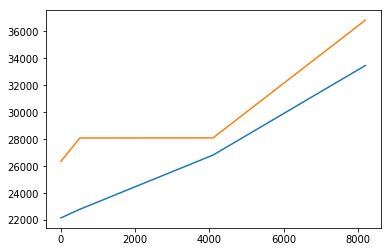

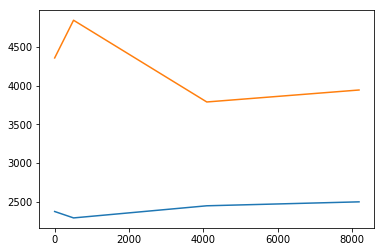

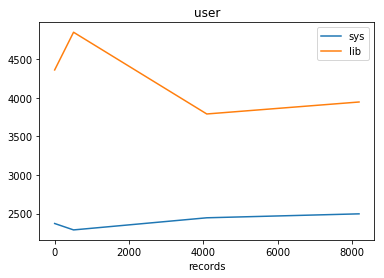

,time
rsize,
4,19668.0
512,20308.0
4096,24109.0
8192,30175.0


,time
rsize,
4,21834.0
512,23032.0
4096,23748.0
8192,31460.0


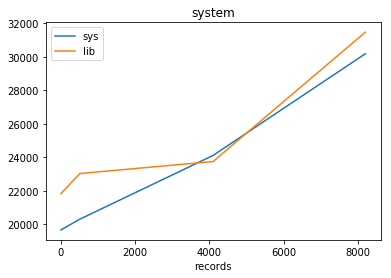

,time
rsize,
4,22166.0
512,22805.0
4096,26824.0
8192,33460.0


,time
rsize,
4,26354.0
512,28090.0
4096,28098.0
8192,36818.0


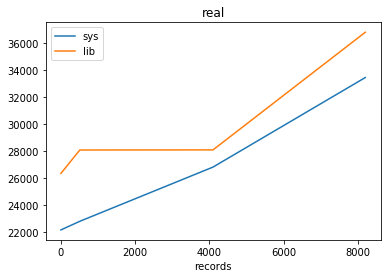

In [97]:
ax#display(data[data.kind == ' user '])
s1 = 5000
s2 = 10000
fig, ax = plt.subplots()
def plot(timetype):

    plotted1 = data[True == data.syscalls][data.operation == 'sort'][data.records == s1][data.kind ==  timetype][['rsize', 'time']].set_index('rsize').sort_index()
    plotted2 = data[False == data.syscalls][data.operation == 'sort'][data.records == s1][data.kind == timetype][['rsize', 'time']].set_index('rsize').sort_index()
    #plotted3 = data[True == data.syscalls][data.operation == 'sort'][data.records == s2][data.kind ==  timetype][['rsize', 'speed']].set_index('rsize').sort_index()
    #plotted4 = data[False == data.syscalls][data.operation == 'sort'][data.records == s2][data.kind == timetype][['rsize', 'speed']].set_index('rsize').sort_index()
    #plotted.sort_index
    #display(plotted)
    display(plotted1)
    display(plotted2)

    ax = plt.plot(plotted1, label='sys')
    ax = plt.plot(plotted2, label='lib')
    #ax = plt.plot(plotted3, label='sys {}'.format(s2))
    #ax = plt.plot(plotted4, label='lib {}'.format(s2))
    plt.xlabel("records")
    
    plt.legend(loc='best')
    plt.title(timetype)


    plt.show()
plot('user')
plot('system')
plot('real')

/home/wojciech/personal/prace/code/ml/ml-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/wojciech/personal/prace/code/ml/ml-venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,time
rsize,
4,22.0
512,22.0
4096,24.0
8192,40.0


,time
rsize,
4,7.0
512,4.0
4096,28.0
8192,59.0


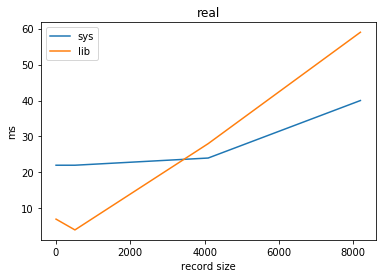

,time
rsize,
4,1.0
512,2.0
4096,0.0
8192,1.0


,time
rsize,
4,0.0
512,0.0
4096,1.0
8192,0.0


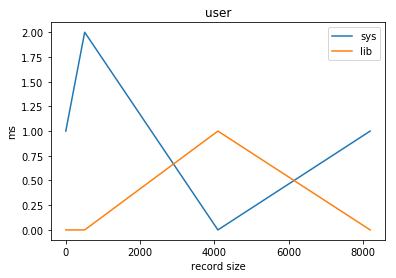

,time
rsize,
4,21.0
512,19.0
4096,21.0
8192,31.0


,time
rsize,
4,6.0
512,3.0
4096,19.0
8192,50.0


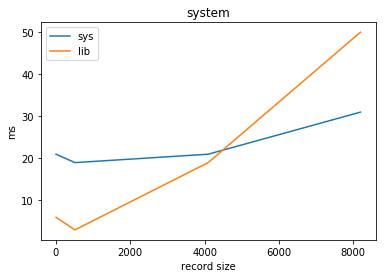

In [98]:
ax#display(data[data.kind == ' user '])
s1 = 5000
s2 = 10000
fig, ax = plt.subplots()
def plot(timetype):

    plotted1 = data[True == data.syscalls][data.operation == 'copy'][data.records == s1][data.kind ==  timetype][['rsize', 'time']].set_index('rsize').sort_index()
    plotted2 = data[False == data.syscalls][data.operation == 'copy'][data.records == s1][data.kind == timetype][['rsize', 'time']].set_index('rsize').sort_index()
    #plotted3 = data[True == data.syscalls][data.operation == 'sort'][data.records == s2][data.kind ==  timetype][['rsize', 'time']].set_index('rsize').sort_index()
    #plotted4 = data[False == data.syscalls][data.operation == 'sort'][data.records == s2][data.kind == timetype][['rsize', 'time']].set_index('rsize').sort_index()
    #plotted.sort_index
    #display(plotted)
    display(plotted1)
    display(plotted2)

    ax = plt.plot(plotted1, label='sys')
    ax = plt.plot(plotted2, label='lib')
    #ax = plt.plot(plotted3, label='sys {}'.format(s2))
    #ax = plt.plot(plotted4, label='lib {}'.format(s2))
    plt.xlabel("record size")
    plt.ylabel("ms")
    
    plt.legend(loc='best')
    plt.title(timetype)


    plt.show()
plot('real')
plot('user')
plot('system')